In [43]:
# Importing libraries 
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [46]:
df = Path("Resources/Student performance (Polytechnic Institute of Portalegre).csv")
performance_df = pd.read_csv(df)
performance_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [6]:
# Define the mapping
mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
# Apply the mapping to the 'Target' column
performance_df['Target'] = performance_df['Target'].map(mapping)
# Convert the 'Target' column to an array
target_array = performance_df['Target'].values
print(target_array)

[0 2 0 ... 0 2 2]


In [7]:
model = KMeans(n_clusters=3)

In [8]:
model.fit(performance_df)

/Users/kaylajehnzen/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
# Predict the model segments (clusters)
clusters = model.predict(performance_df)
# View the stock segments
print(clusters)

# Create a new column in the DataFrame with the predicted clusters
performance_df["Cluster"] = clusters
# Review the DataFrame
performance_df.head()

[1 0 0 ... 2 0 2]


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Cluster
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,0


In [10]:
# Create a scatter plot 
performance_df.hvplot.scatter(
    y="Target",
    x="Previous qualification (grade)",
    by="Cluster",
    title = "Scatter Plot by Grade")

:NdOverlay   [Cluster]
   :Scatter   [Previous qualification (grade)]   (Target)

In [11]:
PCA=PCA(n_components = 3)

In [12]:
PCA_data = PCA.fit_transform(performance_df)

In [13]:
PCA_data[:5]

array([[ 8.68566081e+03, -8.54941963e-01, -1.44636041e+00],
       [-3.97309274e+02, -1.37686476e+01,  2.89722952e+01],
       [-2.13334747e+02, -2.05475256e+00, -8.57994757e+00],
       [-9.16379521e+02, -9.01793349e+00, -1.80644156e+01],
       [ 8.42606536e+02, -1.28120881e-01, -3.63764101e+01]])

In [14]:
PCA.explained_variance_ratio_

array([9.99334288e-01, 3.00321082e-04, 9.48201808e-05])

In [15]:
age_counts = performance_df.groupby(["Age at enrollment", 'Target']).size().unstack(fill_value=0)
# Display the result
#print(age_counts)


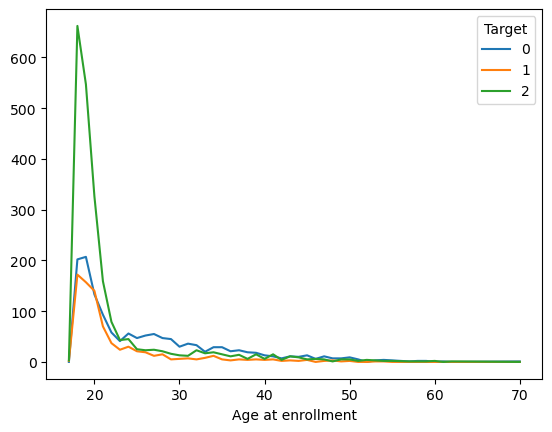

In [16]:
age_counts.plot()
plt.savefig('Figures/Age_at_enrollment.PNG')
plt.show()

In [17]:
scholarship_counts = performance_df.groupby(["Scholarship holder", 'Target']).size().unstack(fill_value=0)
# Display the result
#print(scholarship_counts)

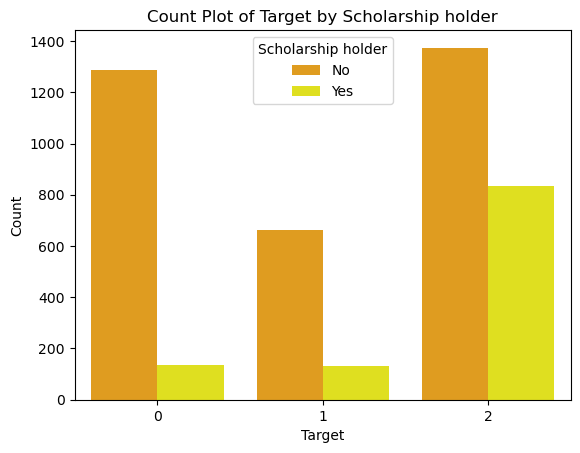

In [18]:
#plot scholarship holder 
df_plot = performance_df.replace({'Scholarship holder': {1: 'Yes', 0: 'No'}})
colors = ['orange', 'yellow']
sns.countplot(x='Target', data=df_plot, hue='Scholarship holder', palette=colors)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count Plot of Target by Scholarship holder');
plt.savefig('Figures/scholarship_holder.PNG')

In [19]:
tuition_fees_counts = performance_df.groupby(["Tuition fees up to date", 'Target']).size().unstack(fill_value=0)
# Display the result
#print(tuition_fees_counts)

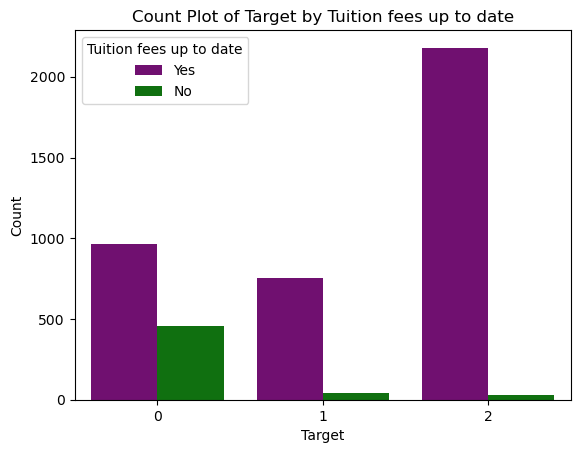

In [20]:
#plot tuition fees up to date
df_plot = performance_df.replace({'Tuition fees up to date': {1: 'Yes', 0: 'No'}})
colors = ['purple', 'green']
sns.countplot(x='Target', data=df_plot, hue='Tuition fees up to date', palette=colors)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count Plot of Target by Tuition fees up to date');

In [21]:
g_counts = performance_df.groupby(["Gender", 'Target']).size().unstack(fill_value=0)
# Display the result
#print(g_counts)

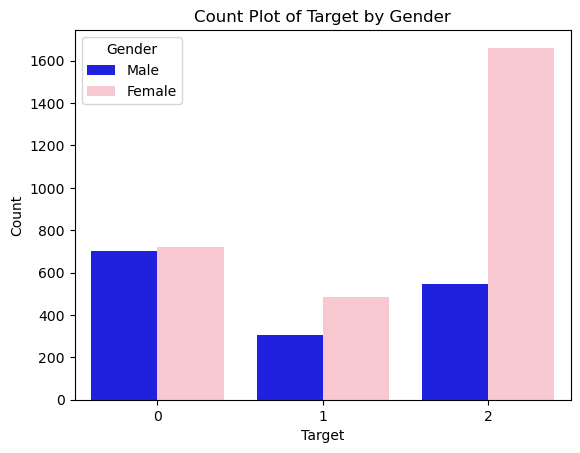

In [22]:
df_plot = performance_df.replace({'Gender': {1: 'Male', 0: 'Female'}})
colors = ['blue', 'pink']
sns.countplot(x='Target', data=df_plot, hue='Gender', palette=colors)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count Plot of Target by Gender');

In [23]:
print("Descriptive Statistics:")
performance_df.describe()

Descriptive Statistics:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Cluster
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119,0.915235
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243,0.970421
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000,0.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000,2.000000


In [24]:
X = performance_df.drop(columns=['Target'])  # Features
y =performance_df['Target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

# Standardize numerical features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

In [25]:
# Declare a logistic regression model.
logistic_regression_model = LogisticRegression(random_state=42, max_iter=10000 )

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [26]:
#Generate training predictions
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

In [27]:
# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

[[ 824   88  135]
 [ 144  193  260]
 [  43   69 1562]]


In [28]:
# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)
test_matrix_df =pd.DataFrame(test_matrix, index=['actual dropout','actual enrolled','actual graduate'],
                             columns=['predicted dropout','predicted enrolled','predicted graduate'])
# Print the confusion matrix for the testing data
print(test_matrix_df)

                 predicted dropout  predicted enrolled  predicted graduate
actual dropout                 293                  27                  54
actual enrolled                 59                  53                  85
actual graduate                 19                  29                 487


In [29]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1047
           1       0.55      0.32      0.41       597
           2       0.80      0.93      0.86      1674

    accuracy                           0.78      3318
   macro avg       0.72      0.68      0.69      3318
weighted avg       0.76      0.78      0.76      3318



In [30]:
# Define features set
X = performance_df.copy()
X.drop("Target", axis=1, inplace=True)
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Cluster
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [31]:
# Define target vector
y= performance_df["Target"].ravel()
y[:5]

array([0, 2, 0, 2, 2])

In [32]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [34]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [35]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

In [37]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [38]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [39]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Dropout", "Actual Enrolled","Actual Graduate"], 
    columns=["Predicted Dropout", "Predicted Enrolled","Predicted Graduate"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [40]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Dropout,Predicted Enrolled,Predicted Graduate
Actual Dropout,292,27,55
Actual Enrolled,58,60,79
Actual Graduate,12,25,498


Accuracy Score : 0.7685352622061483
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       374
           1       0.54      0.30      0.39       197
           2       0.79      0.93      0.85       535

    accuracy                           0.77      1106
   macro avg       0.71      0.67      0.68      1106
weighted avg       0.75      0.77      0.75      1106



In [41]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.14884823423782367, 'Curricular units 2nd sem (approved)'),
 (0.09828151993714206, 'Curricular units 2nd sem (grade)'),
 (0.09093599522293078, 'Curricular units 1st sem (approved)'),
 (0.07017591956837063, 'Curricular units 1st sem (grade)'),
 (0.04332404604656995, 'Curricular units 2nd sem (evaluations)'),
 (0.042114489906254236, 'Admission grade'),
 (0.041834574721681804, 'Tuition fees up to date'),
 (0.0373732304057378, 'Previous qualification (grade)'),
 (0.035825333443703436, 'Age at enrollment'),
 (0.03577282332319151, 'Curricular units 1st sem (evaluations)'),
 (0.03184457471039918, 'Course'),
 (0.028748962932600604, "Father's occupation"),
 (0.02447740735156697, "Mother's occupation"),
 (0.023751846777558767, 'GDP'),
 (0.021517378928236953, 'Unemployment rate'),
 (0.02109338066305795, "Father's qualification"),
 (0.02101266321743129, 'Application mode'),
 (0.02077594559074809, 'Inflation rate'),
 (0.020204866886569143, "Mother's qualification"),
 (0.019517681058679223, 'Curr

/var/folders/0h/lqy3k6gn3dnf1vwn1ct91kc80000gn/T/ipykernel_10585/3856464396.py:8: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/var/folders/0h/lqy3k6gn3dnf1vwn1ct91kc80000gn/T/ipykernel_10585/3856464396.py:9: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('Figures/Features_Importances.PNG')
/Users/kaylajehnzen/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


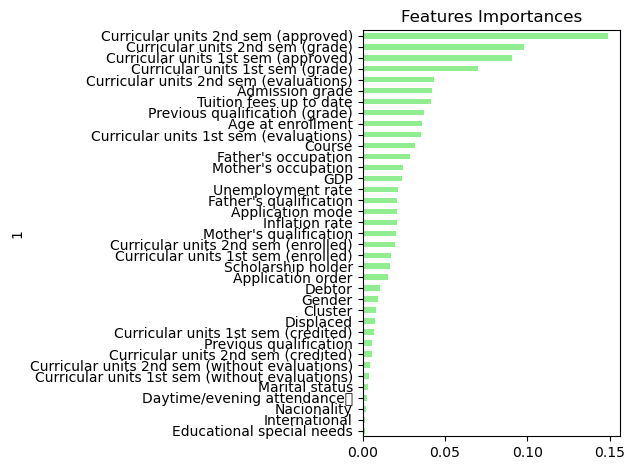

In [42]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
plt.tight_layout()
plt.savefig('Figures/Features_Importances.PNG')
plt.show()